**IRIS : Classificazione multiclasse categorica**

Questo esercizio ci permetterà di creare una rete neurale in grado di predire la varietà di un determinato tipo di IRIS (una tipologia di pianta) in base ad alcuni parametri :


*   Lunghezza del Sepalo
*   Larghezza del Sepalo
*   Lunghezza del Petalo
*   Larghezza del Petalo

Esistono 3 varietà di IRIS : Setosa, Versicolor, Virginica. In base ai valori forniti come input dobbiamo riuscire a capire se di quale classe si tratta. Questo è un **problema di classificazione multiclasse categorica**, ovvero un esempio può appartenere solamente ad una classe e non a più di una classe (un IRIS può essere solamente un IRIS Versicolor oppure Virginica oppure Setosa)


**Installazione delle dipendenze necessarie**

Installeremo :


*   Pandas : libreria python che ci permette di manipolare tabelle di dati, che vengono chiamate Dataframe
*   Matplotlib : libreria python che ci permette di fare grafici
*   SciKitLearn : libreria python con funzioni di utilità per la manipolazione numerica dei dataframe pandas
*   Keras : libreria python per la creazione di reti neurali





In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install keras

**Importazione dei moduli necessari**

Come prima cosa, nel nostro programma python effettuiamo le import delle dipendenze necessarie

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

**Caricamento del dataset**

Scarichiamo il nostro set di dati, tipicamente in formato csv. Andremo poi ad analizzarlo per vedere come è strutturato e quali sono le colonne e i valori che contiene

In [5]:
dataset = pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv");

In [21]:
dataset.head(100) #visualizza i primi n elementi della tabella

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Versicolor
96,5.7,2.9,4.2,1.3,Versicolor
97,6.2,2.9,4.3,1.3,Versicolor
98,5.1,2.5,3.0,1.1,Versicolor


In [ ]:
dataset.tail(100) #visualizza gli ultimi n elementi della tabella

In [ ]:
dataset.info() #visualizza informazioni dettagliate sul nostro dataset

**Creiamo degli array numpy**

La libreria Keras, che serve per creare le reti neurali, lavora però con un formato di dati particolare. Gli array Numpy. Potete immaginarli come degli array ndimensionali, una sorta di matrici. Quello che dobbiamo fare quindi sarà convertire il nostro dataframe in due array numpy : uno per le features e uno per le labels

In [9]:
X = dataset.drop('variety',axis=1); # creiamo l'array numpy delle features droppando dal dataset l'ultima colonna che contiene le labels
Y = dataset['variety'].values; # creiamo l'array numpy prendendo dal dataset solamente la colonna che contiene le labels

**Standardiziamo i dati**

Lavorare con i dati non standardizzati, cioè con numeri grandi, implica più lavoro per la nostra intelligenza artificiale. L'idea è quella che più sono grandi i numeri in input, più variazioni piccole di discesa del gradiente sono necessarie per raggiungere il minimo ricercato. Oggi useremo uno StandardScaler, cioè uno scaler che ci permetterà di trasformare i nostri numeri in ogni colonna in numeri in un intervallo tra -1 e 1 dividendo tutti i valori per la deviazione standard


In [10]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y_le = le.fit_transform(Y)
Y_mapping = dict(zip(le.classes_, range(0, len(le.classes_)+1)))
print(Y_mapping)

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}


**Gestione delle Labels**

Adesso che abbiamo standardizzato i dati ci dedichiamo alla colonna output. Come sappiamo le reti neurali lavorano solamente con i numeri, ma nella colonna degli output abbiamo però dei testi. Quello che dovremmo fare e trovare un modo di convertire questi valori in numeri. Uno degli approcci suggeriti nei progetti di classificazione è quello di creare una colonna per ogni valore testuale univoco e assegnare a quella colonna il valore 0 oppure 1 in corrispondenza della presenza oppure no del valore



In [ ]:
Y_cat = to_categorical(Y_le,3)
Y_cat

**Addestramento**

ora che abbiamo i nostri due arrays numpy preparati a dovere, uno per le features e uno per le labels, procediamo a creare la nostra rete neurale usando keras. Prima di tutto dai nostri array numpi estraiamo un subset di dati per l'addestramento e uno per i test, per vedere effettivamente se la nostra rete neurale funziona


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y_cat, test_size=0.2,random_state = 0);

adesso creiamo la nostra rete neurale strato per strato e addestriamola. Durante l'addestramento vedremo gradualmente scendere il valore di loss, che sarebbe il valore della nostra funzione di errore (sempre se tutto è andato bene !) e dovremmo veder aumentare anche il valore dell'accuratezza del risultato

In [ ]:
model = Sequential()
model.add(Dense(1000,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(500,activation="relu"))
model.add(Dense(300,activation="relu"))
model.add(Dense(3,activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

history = model.fit(X_train,Y_train,epochs=200)

Abbiamo adesso il modello addestrato e nella variabile history la storia della nostra funzione di errore. Possiamo graficarla per vedere com'è stato l'andamento dell'errore dall'inizio dell'addestramento fino alla fine


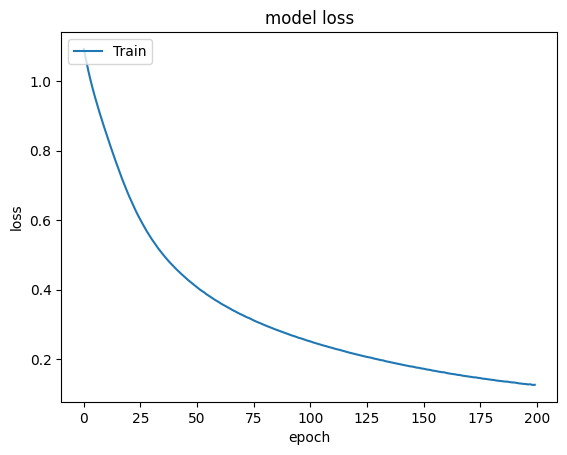

In [15]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
Y_test

In [ ]:
Y_pred

**Testiamo la nostra rete neurale su nuovi valori**

Procediamo adesso a testare la nostra rete neurale appena creata mandando un nuovo set di valori. Ricordiamoci che abbiamo usato uno scaler per addestrarla, quindi dobbiamo scalare anche i nostri valori di input per effettuare la predizione, usando lo stesso scaler.

In [20]:
valori_test = np.array([[5.1,	3.5,	1.4,	0.2]],dtype=np.double) #creiamo l'array numpy dei valori per i quali vogliamo effettuare la predizione
valori_test_transformed = sc.transform(valori_test) #effettuiamo lo scale di questi valori utilizzando lo stesso scaler usato in addestramento
Y_vtp = model.predict(valori_test_transformed) #effettuiamo la predizione
Y_vtp # mostriamo i valori ottenuti

1/1 [==============================] - 0s 25ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[9.9691391e-01, 2.5756417e-03, 5.1047996e-04]], dtype=float32)